In [1]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

In [3]:
file_path = 'C:\\Users\\svsur\\Downloads\\Data Analyst - Test Data.xlsx'
df = pd.read_excel(file_path)

In [4]:
print(df.head())

                                              Review       date     Location
0  I was very impressed with the resort.\n Great ... 2019-08-20    Sebastian
1  The rooms were nice the outside needs work als... 2019-08-20  Los Angeles
2  Great location! I have stayed at this hotel on... 2019-08-20      Georgia
3  The hotel was adequate for my stay. The strips... 2019-08-20          NaN
4  Great location, room was large and spacious. P... 2019-08-19  Palm Harbor


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6448 entries, 0 to 6447
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Review    6393 non-null   object        
 1   date      6448 non-null   datetime64[ns]
 2   Location  1711 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 151.3+ KB
None


In [6]:
print(df.describe())

                                date
count                           6448
mean   2019-02-06 15:55:09.677419264
min              2018-08-01 00:00:00
25%              2018-11-10 00:00:00
50%              2019-02-04 00:00:00
75%              2019-05-01 00:00:00
max              2019-08-20 00:00:00


In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
print(df.isnull().sum())

Review        55
date           0
Location    4737
dtype: int64


In [9]:
df.dropna(inplace=True)

In [10]:
df.Review[0]

'I was very impressed with the resort.\n Great staff at the main resort pool bar! We had a blast with them.\n Clean, professional staff, great location and very reasonable!\n  \n  Read more\n  Read less'

In [11]:
df['Review'] = df['Review'].str.replace("\n","")

In [12]:
df['Review'] = df['Review'].str.replace("Read more","")

In [13]:
df['Review'] = df['Review'].str.replace("Read less","")

In [14]:
df.Review.head()

0     I was very impressed with the resort. Great st...
1     The rooms were nice the outside needs work als...
2     Great location! I have stayed at this hotel on...
4     Great location, room was large and spacious. P...
10    Very clean and friendly and I love the locatio...
Name: Review, dtype: object

In [15]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\svsur\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [16]:
sid = SentimentIntensityAnalyzer()

In [19]:
df['Sentiment Scores'] = df['Review'].apply(lambda Review: sid.polarity_scores(Review))

In [20]:
df['Compound'] = df['Sentiment Scores'].apply(lambda score_dict: score_dict['compound'])

In [21]:
def categorize_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Compound'].apply(categorize_sentiment)

In [22]:
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)

Sentiment
Positive    1176
Negative     340
Neutral      189
Name: count, dtype: int64


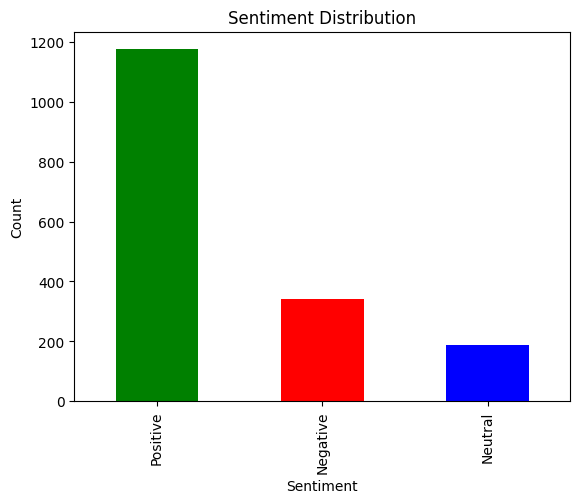

In [23]:
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [25]:
df['YearMonth'] = df['date'].dt.to_period('M')
sentiment_over_time = df.groupby(['YearMonth', 'Sentiment']).size().unstack().fillna(0)
print(sentiment_over_time)

Sentiment  Negative  Neutral  Positive
YearMonth                             
2018-08          21       16        86
2018-09          31       17       102
2018-10          43       18       125
2018-11          28       15       111
2018-12          19        8        86
2019-01          21       10        69
2019-02          14        6        46
2019-03          33       13        84
2019-04          31       10        94
2019-05          20        8        80
2019-06           8        7        41
2019-07          38       35       158
2019-08          33       26        94


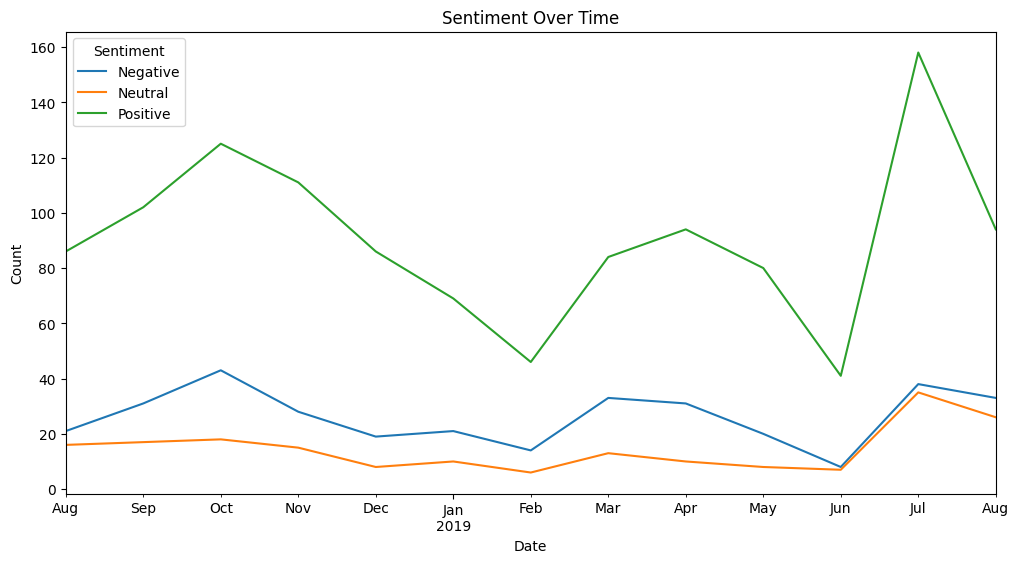

In [26]:
sentiment_over_time.plot(kind='line', figsize=(12, 6))
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

In [27]:
location_sentiment = df.groupby(['Location', 'Sentiment']).size().unstack().fillna(0)
print(location_sentiment)

Sentiment                                    Negative  Neutral  Positive
Location                                                                
2186                                              0.0      0.0       1.0
Aalborg, Denmark                                  0.0      0.0       1.0
Abbotsford BC                                     0.0      0.0       1.0
Agde                                              0.0      1.0       0.0
Aguadilla, P.R.                                   1.0      0.0       0.0
...                                               ...      ...       ...
warwick ny                                        0.0      0.0       1.0
wyndham garden silicon valley ,san jose ca.       1.0      0.0       0.0
yakima wa                                         0.0      0.0       1.0
大阪                                                0.0      1.0       0.0
東京                                                0.0      2.0       0.0

[1078 rows x 3 columns]


C:\Users\svsur\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\svsur\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38442 (\N{CJK UNIFIED IDEOGRAPH-962A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\svsur\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26481 (\N{CJK UNIFIED IDEOGRAPH-6771}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\svsur\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20140 (\N{CJK UNIFIED IDEOGRAPH-4EAC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


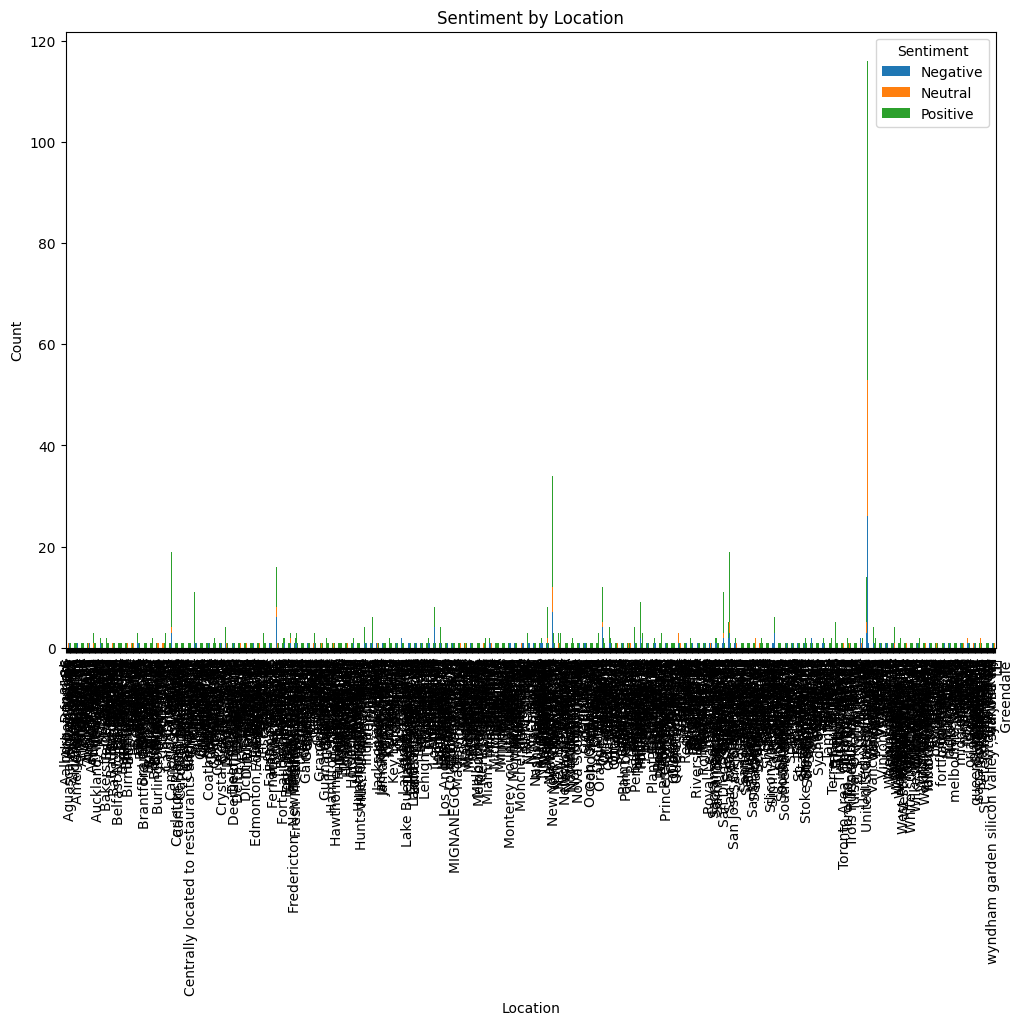

In [28]:
location_sentiment.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Sentiment by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

In [29]:
df.to_excel('C:\\Users\\svsur\\Downloads\\processed_hotel_reviews1.xlsx', index=False)